## Problem 1: Calculating the 2018/2019 EPL Champion (Lecture 12)

In the directory of this homework assignment I have copied a csv file containing information regarding the 2018-2019 English Premier League season ("soccer" for Americans, "football" for the English, etc.). This information was obtained from https://sports-statistics.com/sports-data/soccer-datasets/ . 

a.) 

A line in this `premierleague.csv` is formatted: 
```
Division, Date, Home Team, Away Team, Home Team Final Score, Away Team Final Score, ...
```
By iterating through `premierleague.csv` , create a *set* of the teams that were in the EPL during the 2018/2019 season. 

In [1]:
with open("premierleague.csv",'r') as file:
    print(type(file))
    lines = file.readlines()
    for i in range(5):
        print(lines[0].split(","))
        print(" ")

    teams = set([line.split(",")[2] for line in lines])
    print(teams)

<class '_io.TextIOWrapper'>
['E0', '10/08/2018', 'Man United', 'Leicester', '2', '1', 'H', '1', '0', 'H', 'A Marriner', '8', '13', '6', '4', '11', '8', '2', '5', '2', '1', '0', '0', '1.57', '3.9', '7.5', '1.53', '4', '7.5', '1.55', '3.8', '7', '1.58', '3.93', '7.5', '1.57', '3.8', '6', '1.57', '4', '7', '39', '1.6', '1.56', '4.2', '3.92', '8.05', '7.06', '38', '2.12', '2.03', '1.85', '1.79', '17', '-0.75', '1.75', '1.7', '2.29', '2.21', '1.55', '4.07', '7.69\n']
 
['E0', '10/08/2018', 'Man United', 'Leicester', '2', '1', 'H', '1', '0', 'H', 'A Marriner', '8', '13', '6', '4', '11', '8', '2', '5', '2', '1', '0', '0', '1.57', '3.9', '7.5', '1.53', '4', '7.5', '1.55', '3.8', '7', '1.58', '3.93', '7.5', '1.57', '3.8', '6', '1.57', '4', '7', '39', '1.6', '1.56', '4.2', '3.92', '8.05', '7.06', '38', '2.12', '2.03', '1.85', '1.79', '17', '-0.75', '1.75', '1.7', '2.29', '2.21', '1.55', '4.07', '7.69\n']
 
['E0', '10/08/2018', 'Man United', 'Leicester', '2', '1', 'H', '1', '0', 'H', 'A Marriner'

b.) 

Using the set you created in part a.), create a dictionary `recordDict` with 
- keys given by the teams in the EPL during the 2018/2019 season
- values given by a list of three zeroes `[0,0,0]`.

In [2]:
recordDict = {team : [0,0,0] for team in teams}
print(recordDict)

{'Wolves': [0, 0, 0], 'Watford': [0, 0, 0], 'Bournemouth': [0, 0, 0], 'Chelsea': [0, 0, 0], 'Arsenal': [0, 0, 0], 'Huddersfield': [0, 0, 0], 'Tottenham': [0, 0, 0], 'Southampton': [0, 0, 0], 'Newcastle': [0, 0, 0], 'Leicester': [0, 0, 0], 'Man City': [0, 0, 0], 'Everton': [0, 0, 0], 'Cardiff': [0, 0, 0], 'Fulham': [0, 0, 0], 'Liverpool': [0, 0, 0], 'Burnley': [0, 0, 0], 'Brighton': [0, 0, 0], 'Man United': [0, 0, 0], 'Crystal Palace': [0, 0, 0], 'West Ham': [0, 0, 0]}


c.) 

By iterating through `premierleague.csv`, modify `recordDict` so that it gives the *records* of each team during the 2018/2019 season. The record should be formatted `[wins, draws, losses]`. In case anyone is unfamiliar with this terminology:
- a `win` is when your team scores more goals than the opponent
- a `loss` is when your team scores fewer goals than the opponent
- a `draw` is when your team scores the same number of goals as the opponent.

To check your answer, calling 
```
print(recordDict['Liverpool'])
```
should give the list 
```
[30,7,1]
```
indicating that in the 2018/2019 season, Liverpool won 30 games, tied 7 games, and lost 1 game.

In [3]:
with open("premierleague.csv",'r') as file:
    lines = file.readlines()
    for line in lines:
        items = line.split(",")
        home, away = items[2], items[3]
        result = items[6]
        if result == "H":
            recordDict[home][0] += 1
            recordDict[away][2] += 1
        elif result == "D":
            recordDict[home][1] += 1
            recordDict[away][1] += 1
        elif result == "A":
            recordDict[home][2] += 1
            recordDict[away][0] += 1
        else:
            recordDict[home][0] += 0
            recordDict[away][0] += 0

In [4]:
recordDict['Liverpool']

[30, 7, 1]

In [5]:
recordDict['Chelsea']

[21, 9, 8]

d.) 

In the EPL each team is assigned a "score" for their season based on their record. Each win during the season is worth 3 points, each draw is worth 1 point, and a loss is worth 0 points. For example, Liverpool's record was `[30,7,1]`, so their score was $3*30+1*7 + 0*1 = 97$ points.

The Premier League Title is awarded to the team who has the most points at the end of the season. By using your `recordDict`, print out the 2018/2019 Premier League Champion (you can check your answer online, but you should be printing it based on your work in the previous parts, not just copying it in)

In [6]:
def score(results):
    return 3 * results[0] + 1 * results[1]

scoreDict = {team : score(recordDict[team]) for team in recordDict.keys()}
winner = max(scoreDict, key = lambda k: scoreDict[k])
show(winner)

'Man City'

## Problem 2: Reviewing Some Cryptosystems (Lectures 14,15,16)

a.)

Suppose Alice and Bob want to communicate using a Diffie-Hellman-Merkle system. In the markdown cell below, write:
- the *public data* that they will use
- the *private keys* that they will use
- the shared key that they will form

Answer here:

- Public data: They will choose a large prime $p$ and a multiplicative generator $g\mod{p}$.

- Private data: They will each choose an integer in the range from $0$ to $p-2$. Alice's integer will be $a$, Bob's integer will be $b$. They publicly transmit $A = g^a\mod p$ and $B = g^b \mod p$.

- Shared key: The shared key is $(g^b)^a \equiv g^{ab} \equiv (g^a)^b$.

b.)

Suppose a bank wants to use an RSA cryptosystem for public key cryptography. In the code cell below, write: 
- the *public data* the bank will publish
- the *private data* that the bank will keep secret
- the *encryption process*. I.e. if I want to send a message $m$ to the bank, how do I encode $m$ using the bank's information?

Answer here:

- Public data: $N = pq$. $p,q$ are very large primes. Also, an integer $e$ which is coprime to $\phi(N)$.

- Private data: $d = e^{-1}(\mod{N})$. This can be found if $\phi(N)$ is known.

- Encryption process: The bank receives $M = m^{e}$, which the bank decrypts as $m=M^{d}$, (all $\mod{N}$).

## Problem 3: Attacks on RSA (Lectures 14,15)

a.) 

In the code cell below I have copied two RSA moduli (i.e. numbers of the form $pq$ with $p, q$ prime). These moduli have the special property that 
$$
N = pq, \;\; M = pr
$$
for some primes $p,q,r$. Use this fact to write down a proper factorization of both $N$ and $M$. Hint: How can you extract the common factor from $N$ and $M$?

For more information regarding this vulnerability, you may want to check out Nadia Heninger's blog post here: https://freedom-to-tinker.com/2012/02/15/new-research-theres-no-need-panic-over-factorable-keys-just-mind-your-ps-and-qs/

In [7]:
N = 448923598736959078013759860477760386672508220724201393343393262163317360862438352992356912965009637923503384680263793291837156300090951698858383723880967577337079084913043205701834696675345326351754549594733211495986250624594231280467988114699202543755690447172132805942902778561246395789857024374442848623844280634284170967601719488557990821372192654848609776276986945576000839045096663404389
M = 8342378131801033186436319488347954384259311310249173679809076731028401878999979392206170316969446607587578850772574786656710721049963868976118196313311101694182015647436787145505477640401929796740715958245795230310909898044710437165581858255882605936018983968362548662474876783903517494711104372044072988370145362051476833992563208491079321682082915227610340995350202435811774592830595543811

q, r = numerator(N/M), denominator(N/M)
p = N/q
all([p*q == N, p*r == M])
print("p =", p)
print(" ")
print("q =", q)
print(" ")
print("r =", r)

p = 592052922033402548292496488240317014489748718427461602151778013906754704991204729591368966794956258707426261890933754225080244584856652112335948219031187531903592802251523607992567121982574462891637
 
q = 758249105831845933594546715344288617476769120250268508890936189254587920359456781681256381635348220868544500971808346750820604361621064506588359942316662865507114612000524007989494784832520238897
 
r = 14090595318994762761805222482166425784455143935578873857884995339221443670108092175622530626974863533780979388546374399964515442120880645999922885411791431330106418433903963606169412122368279703


b.)

In the code cell below I have instantiated an RSA moduli $N$, together with $\phi(N)$. Using this information, write down a proper factorization of $N$. Hint: write $N$ and $\phi(N)$ in terms of the prime divisors of $N$. Using Sage's `solve` function, can you use this to solve for one of those primes somehow?

In [8]:
N = 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000026730000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000801
phiN = 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000026620000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000532

x,y = var('x,y')
print(solve([N==x*y,N - phiN + 1 == x + y],x,y))
print("p = 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000003")
print("q = 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000267")
print("phi(N) = (p-1)(q-1)")

[
[x == 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000003, y == 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000267],
[x == 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000267, y == 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000003]
]
p = 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000003
q = 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000267
phi(N) = (p-1)(q-1)


c.) 

In the code cell below I have instantiated an RSA moduli $N$, a public key $e$, and an encrypted message $M$. The plaintext message $m$ has the property that: $0< m < N^{1/e}$. Use this information to recover $m$.

In [9]:
#Modulus
N = 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000304900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000160923
#Public key
e = 97
#Encoded message
M = 262526565481497746121492137812884859247728419440629755468567054590561546024583037329814880733566655858177029213291615040956496481869698688034366968807804763091541095578804648521095574871486569701

In [10]:
print(int(N^(1/97)))
print(" ")
pltext = 0

for m in range(1, 387):
    if m^e == M:
        pltext = m
        
print(pltext)
print(" ")
print(pltext^e)
print(" ")
print(pltext^e ==M)

386
 
101
 
262526565481497746121492137812884859247728419440629755468567054590561546024583037329814880733566655858177029213291615040956496481869698688034366968807804763091541095578804648521095574871486569701
 
True


## Problem 4: Linear Regression and the Hawaiian-Emperor chain (Lecture 17)

The *Hawaiian-Emperor seamount chain* is an underwater mountain range which starts in the ocean by Hawaii and stretches northwest towards Russia. These underwater mountains were formed as oceanic crust moved across the *Hawaiian hotspot*. Here are two photos explaining the chain, taken from https://seattlecentral.edu/qelp/sets/073/073.html .

![](hw1.png)
![](hw2.png)

As you can see from the picture, the newest seamounts are those which are closest to the Hawaiian hotspot. The older mountains slide away from the hotspot as the oceanic crust moves over time. The purpose of this problem is to explore this relationship.

a.)

The dataset `hawaiianChain.txt` contains space-separated data regarding the mountains in the Hawaiian-Emperor chain. This data was obtained from https://seattlecentral.edu/qelp/sets/073/073.html . Each line is formatted 

```
age distance
```
The age is measured in *millions of years* and the distance is measured in *kilometers from Kilauea* (Kilauea is one of the youngest and most famous products of the Hawaiian hotspot, and is currently located "at the hotspot"). Open the dataset, extract the data, and make a listplot of the data.

['0.20 0\n', '0.38 54\n', '0.43 100\n', '0.75 182\n', '1.03 185\n', '1.32 221\n', '1.28 226\n', '1.76 256\n', '1.90 280\n', '2.60 339\n', '3.70 374\n', '5.10 519\n', '4.89 565\n', '7.20 780\n', '9.60 913\n', '10.30 1058\n', '12.00 1209\n', '13.00 1256\n', '12.30 1435\n', '19.90 1818\n', '26.60 1841\n', '20.60 2291\n', '27.70 2432\n', '28.00 2600\n', '27.40 2825\n', '38.60 3128\n', '38.70 3280\n', '42.40 3493\n', '43.40 3520\n', '39.90 3668\n', '48.10 3758\n', '55.20 4102\n', '55.40 4175\n', '56.20 4452\n', '59.60 4794\n', '64.70 4860\n']


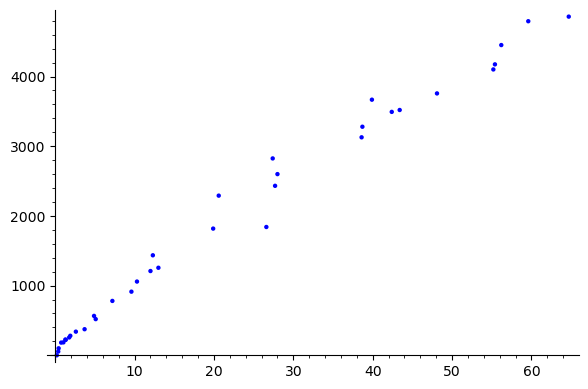

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
with open('hawaiianChain.txt','r') as myFile:
    rawData = myFile.readlines()
print(rawData)
data = [(float(line.strip().split(" ")[0]), float(line.strip().split(" ")[1])) for line in rawData]
list_plot(data)

b.)

Using Scikit Learn, run an OLS linear regression on the data to create a model
$$
distance = \beta_0 + \beta_1 age.
$$

Add a plot of the line your model creates to the list plot and display both in a single graph.

76.31681912371076


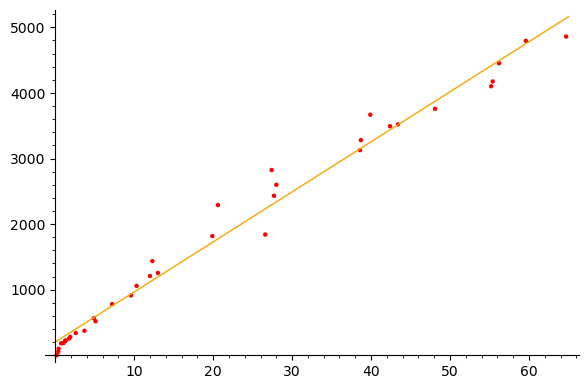

In [12]:
ols = LinearRegression()
npislands = np.asarray(data)
X = np.asarray([[data[0]] for data in npislands])
y = np.asarray([data[1] for data in npislands])
ols.fit(X,y)
b0, b1 = ols.coef_[0], ols.intercept_
print(b0)
list_plot([(X[i],y[i]) for i in range(len(X))], color = 'red')+plot(b0*x + b1,(0,65),color = 'orange')

c.) Use your model to make a prediction regarding the following: Assume a seamount in the Hawaiian-Emperor chain was 16 million years old. Roughly how far from Kilauea would it be?

In [13]:
ols.predict([[16]])

array([1423.80696961])

Your answer here: It would be around 1424 kilometers away from Kilauea.

d.)

As in the end of Lecture 17, give an interpretation of the coefficient on $age$ that you obtain.



For every one million years that pass, the distance from Kilauea increases by about 76.3 kilometers. 

## Problem 5: Feature Engineering and Moore's Law (Lecture 17)

Moore's Law is an empirical observation in computer science which states (roughly) that our "computing power" doubles every two years. Our computing power is measured as the number of transistors which we can fit onto a circuit board. See here for more information: https://en.wikipedia.org/wiki/Moore%27s_law

a.) The file `moore.txt` contains data regarding the number of transistors that were on state of the art circuit boards at certain time points from 1970 to 2010. This data was obtained from Karl Rupp's Github Page: https://github.com/karlrupp.  

The data is formatted using space-separation, i.e. each line in the file has the form:

```
year transistors
```

Extract the data from `moore.txt` and display a list plot of the data to visualize the growth in our computing power from 1970 to 2010.

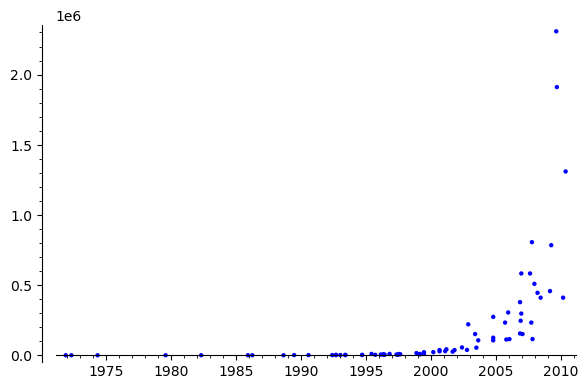

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
with open('moore.txt','r') as myFile:
    rawData = myFile.readlines()
    power = np.asarray([[float(line.strip().split("  ")[0]), float(line.strip().split("  ")[1])] for line in rawData])
    
list_plot(power)

b.)

From your plot, it might not look like linear regression would be useful here. However! What happens if you transform the data by taking the *logarithm* of the $y$ values? Make a new data set where each data point has the form 

`(year, log(number of transistors))`

Make a list plot of the transformed data set. It should look much more linear!

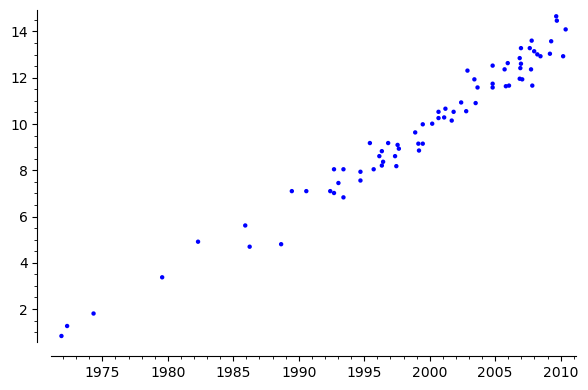

In [15]:
logpower = np.asarray([[line[0], log(line[1])] for line in power])
list_plot(logpower)

c.)

Estimate a linear model 
$$
\log(\text{number of transistors}) = \beta_0+\beta_1*year.
$$
Print the values of $\beta_0$ and $\beta_1$ that you obtain. 

0.3430412809514326


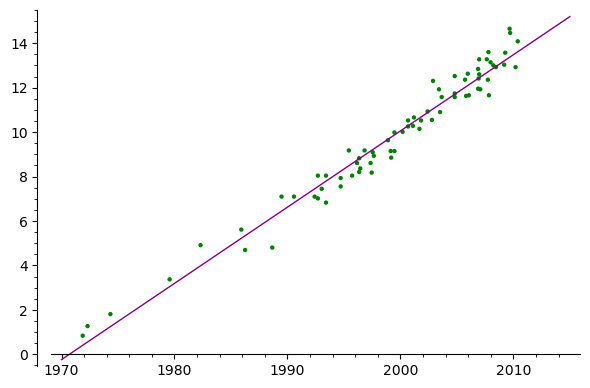

In [19]:
ols = LinearRegression()
nplogpower = np.asarray(logpower)
X = np.asarray([[i[0]] for i in nplogpower])
y = np.asarray([i[1] for i in nplogpower])
ols.fit(X,y)
b0, b1 = ols.coef_[0], ols.intercept_
print(b0)
list_plot([(X[i],y[i]) for i in range(len(X))], color = 'green')+plot(b0*x + b1,(1970,2015),color = 'purple')

d.) 

Using your work in part c.), solve for the number of transistors to obtain a function 
$$
\text{ number of transistors } = f(year).
$$
Plot this function together with your list plot in part a.).

you simply solve by putting both sides of the original equation as powers of e.


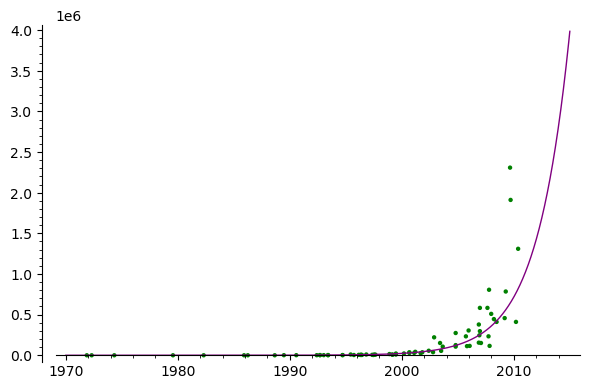

In [21]:
print("you simply solve by putting both sides of the original equation as powers of e.")
list_plot(power, color = 'green') + plot(exp(b0*x + b1), (1970,2015), color = 'purple')

e.) 

What does the data say about how our computing power increases every two years? In other words, what is the relation between $f(year)$ and $f(year+2)$?

In [22]:
print(exp(2*b0))

1.9859205542009246


Your answer here: This shows that our computing power doubles approximately every two years, since the factor value that we found above is very close to 2. 